###                                                          World Happiness Corruption


#### World Happiness Corruption is a  survey of the country of global happiness in 2015-2020. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
happy=pd.read_csv('./WorldHappiness_Corruption_2015_2020_.csv')
happy.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [3]:
happy.tail()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
787,Botswana,3.4789,0.997549,0.0,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.0,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.0,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.0,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24
791,Afghanistan,2.5669,0.300706,0.0,0.266052,0.000000,0.135235,0.001226,1.507236,Asia,2020,0.356434,19


In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [5]:
happy.isnull().mean()*100

Country              0.0
happiness_score      0.0
gdp_per_capita       0.0
family               0.0
health               0.0
freedom              0.0
generosity           0.0
government_trust     0.0
dystopia_residual    0.0
continent            0.0
Year                 0.0
social_support       0.0
cpi_score            0.0
dtype: float64

In [6]:
happy.duplicated().sum()

0

In [7]:
happy.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,792.0,5.473310,1.124726,2.5669,4.590750,5.485500,6.300500,7.808700
gdp_per_capita,792.0,0.929217,0.385774,0.0000,0.644242,0.994544,1.228677,2.096000
family,792.0,0.504998,0.552736,0.0000,0.000000,0.000000,1.040410,1.610574
health,792.0,0.648691,0.232261,0.0000,0.510070,0.685397,0.815641,1.141000
freedom,792.0,0.427016,0.148003,0.0000,0.325433,0.439621,0.546280,0.724000
generosity,792.0,0.212440,0.121660,0.0000,0.125784,0.197000,0.273250,0.838075
government_trust,792.0,0.125720,0.109032,0.0000,0.052862,0.089000,0.154250,0.551910
dystopia_residual,792.0,1.379277,1.075276,0.0000,0.000000,1.731948,2.236894,3.602140
Year,792.0,2017.500000,1.708904,2015.0000,2016.000000,2017.500000,2019.000000,2020.000000
social_support,792.0,0.609302,0.640754,0.0000,0.000000,0.176214,1.268250,1.644000


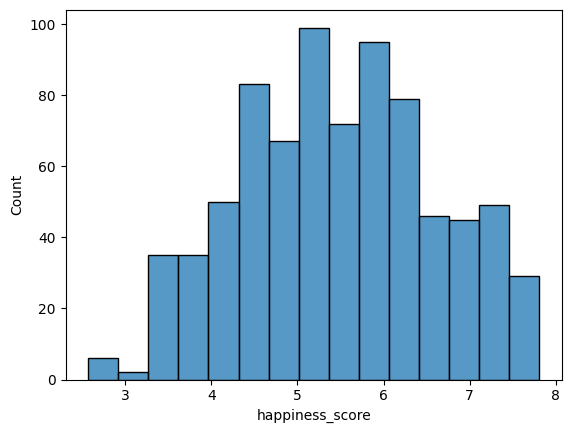

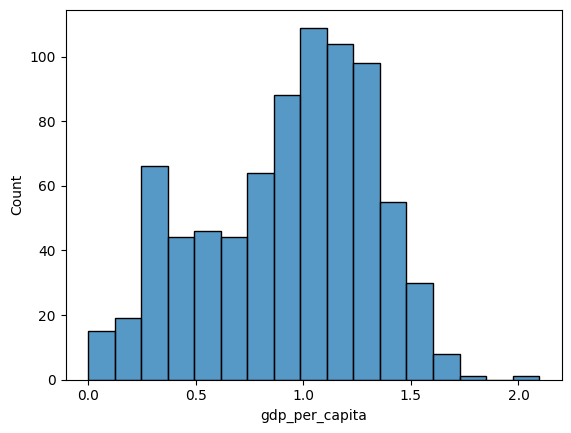

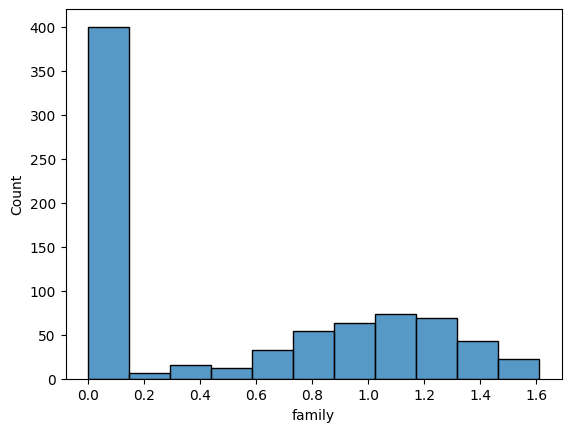

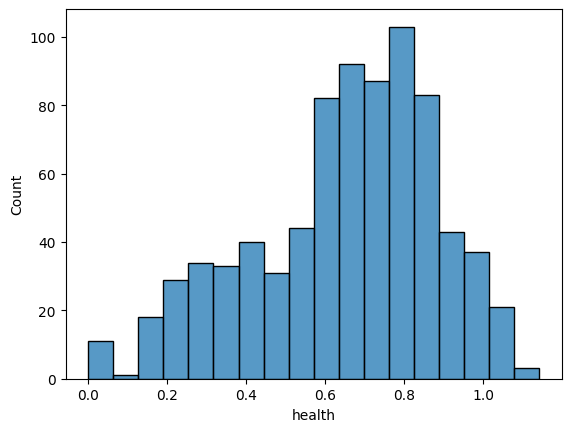

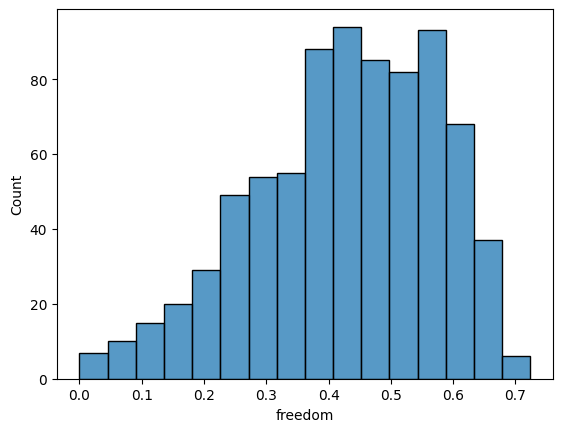

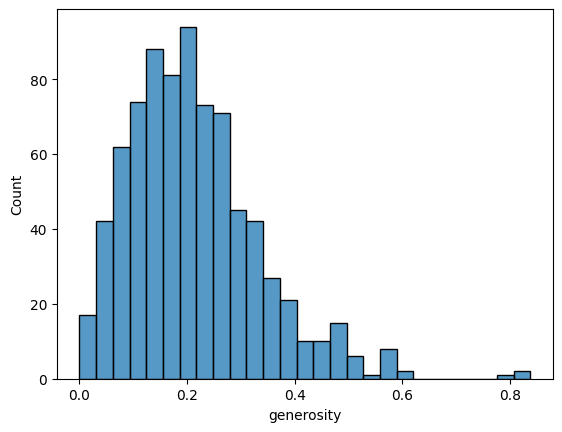

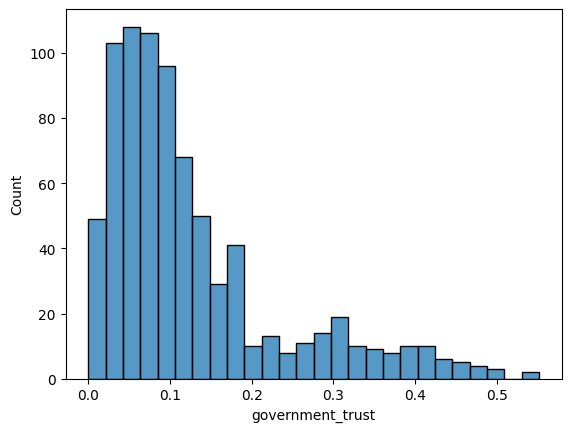

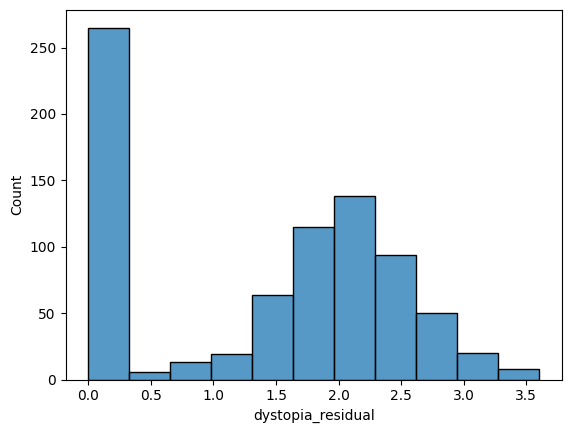

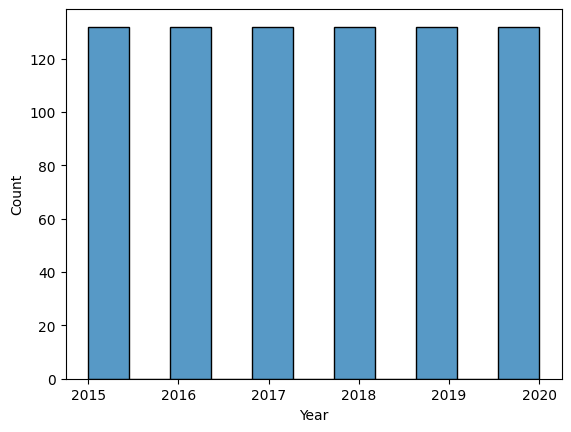

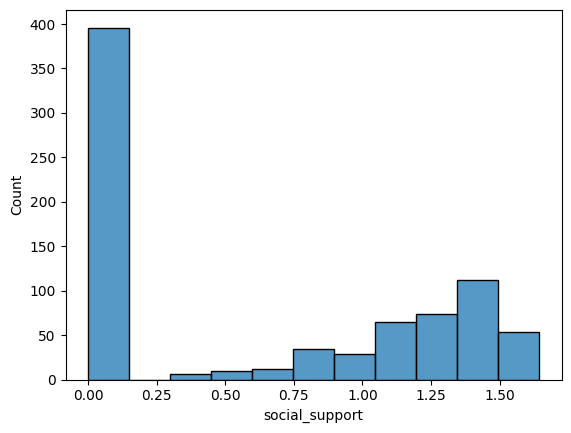

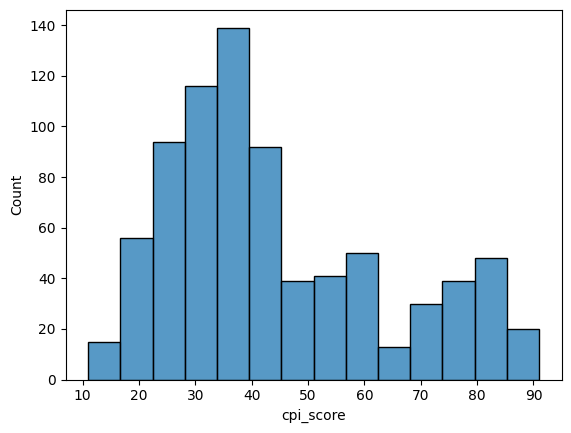

In [8]:
for i in happy.columns:
    if happy[i].dtypes !="object":
        sns.histplot(x= happy[i])
        plt.show()

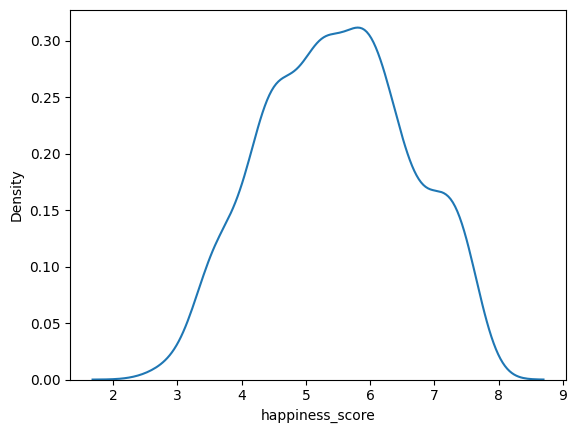

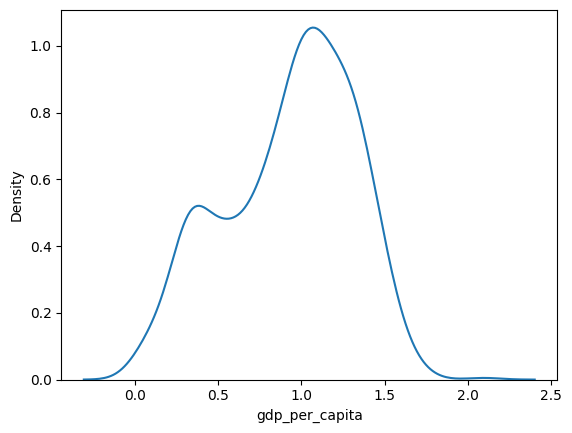

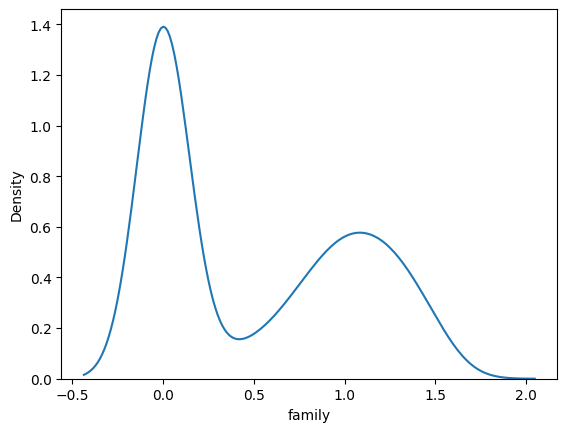

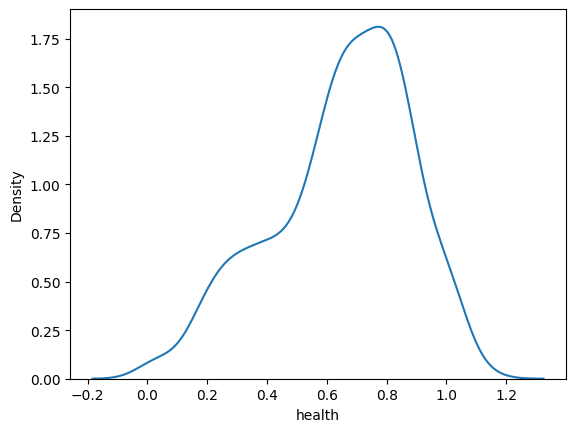

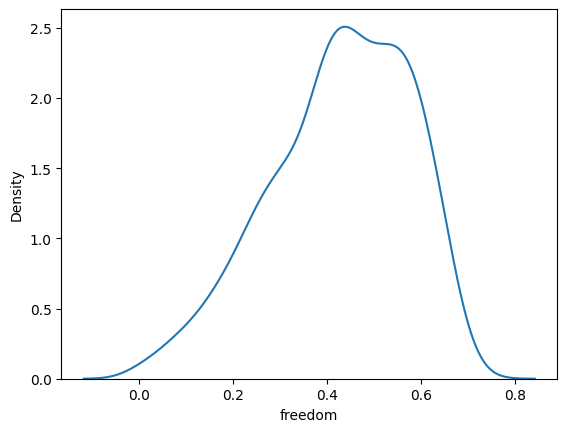

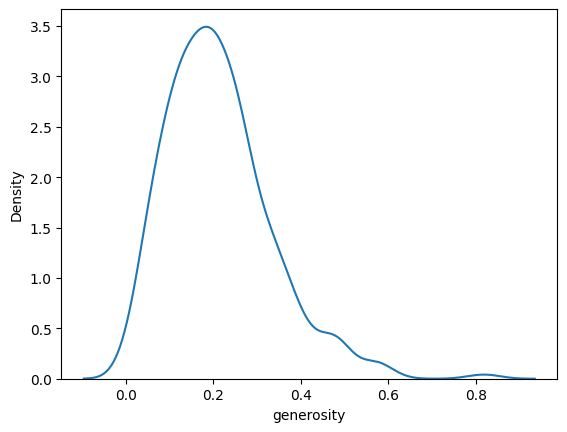

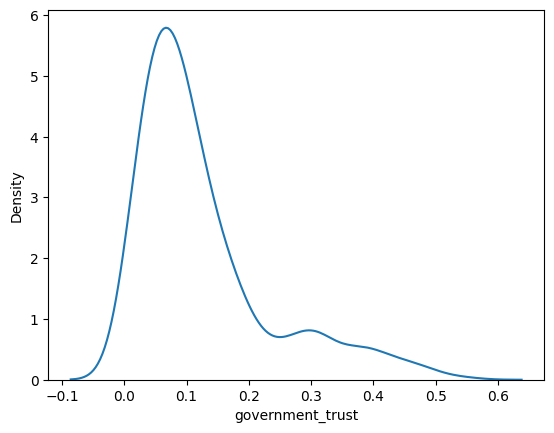

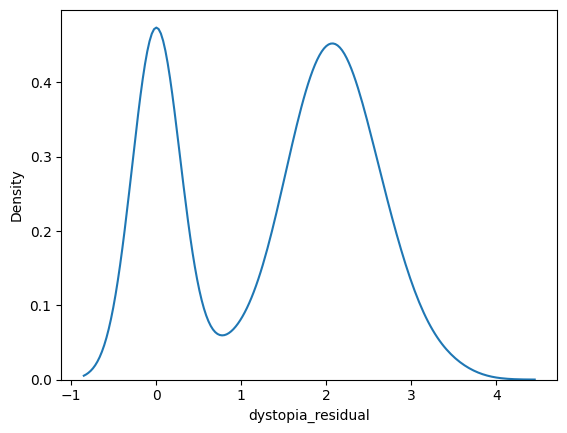

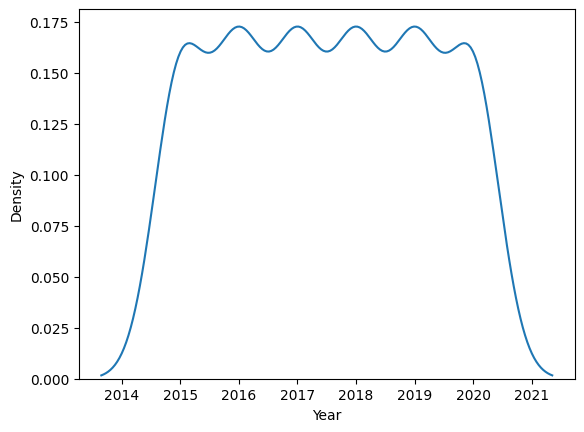

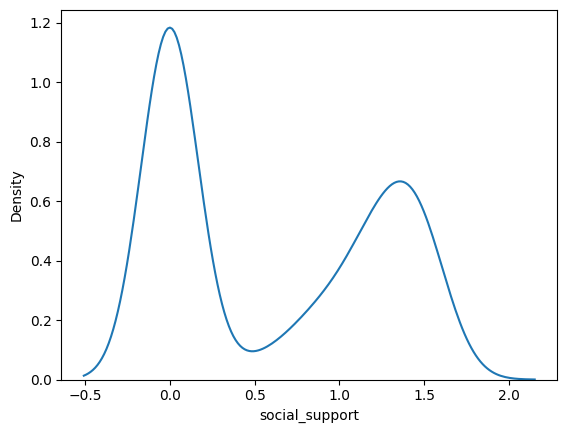

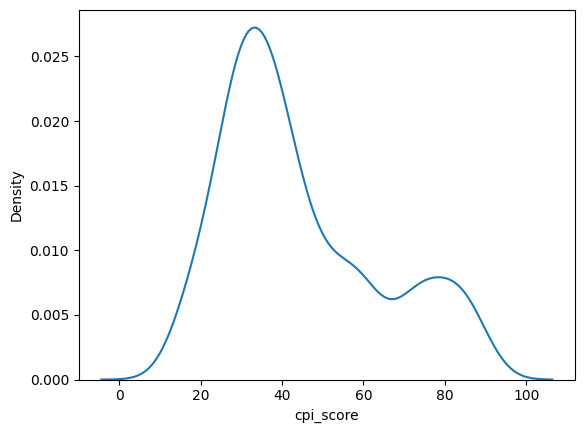

In [9]:
for i in happy.columns:
    if happy[i].dtypes !="object":
        sns.kdeplot(x= happy[i])
        plt.show()

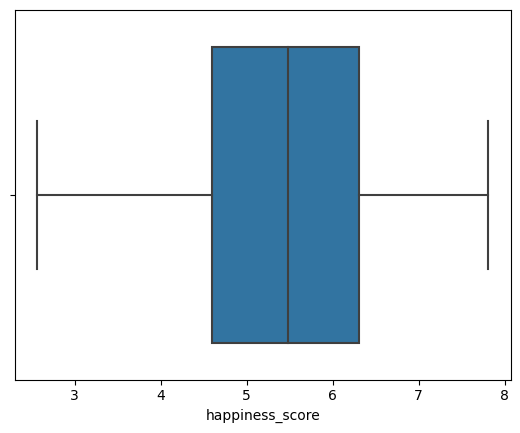

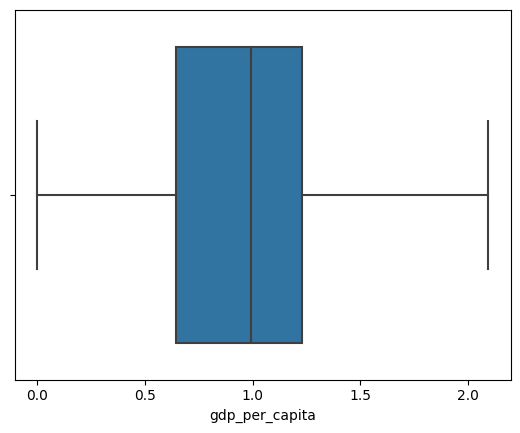

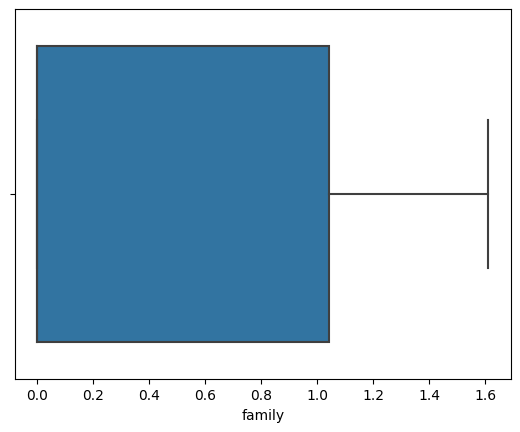

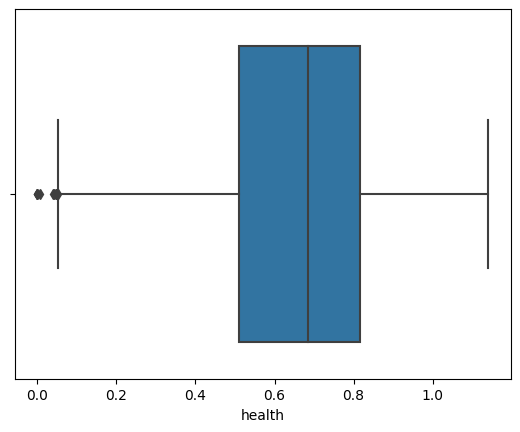

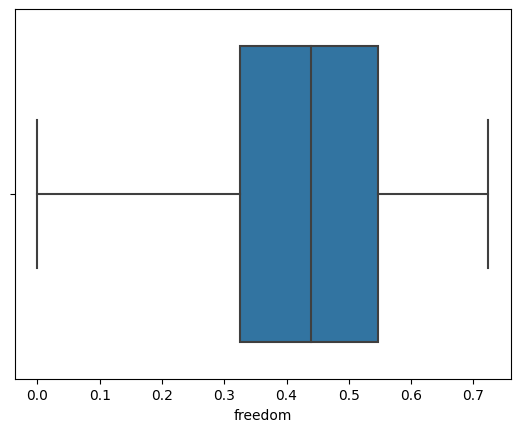

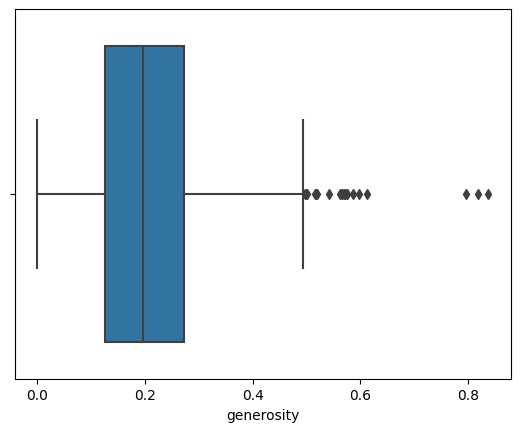

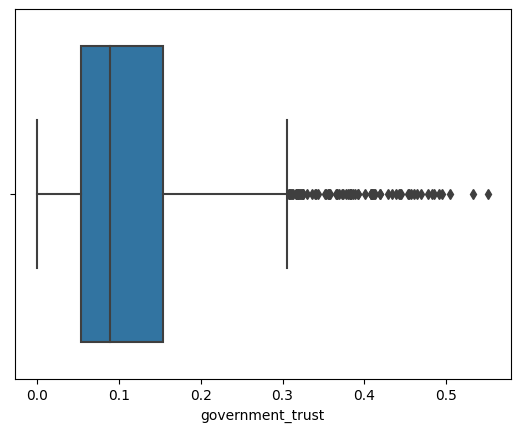

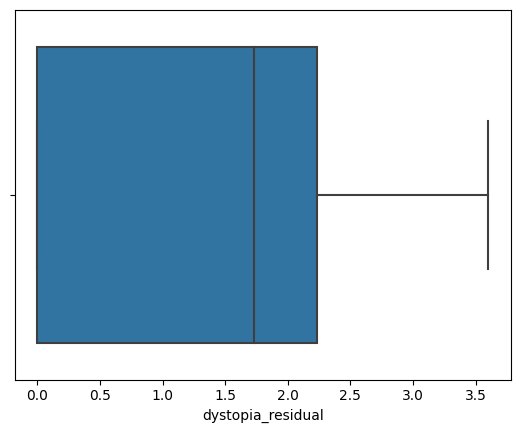

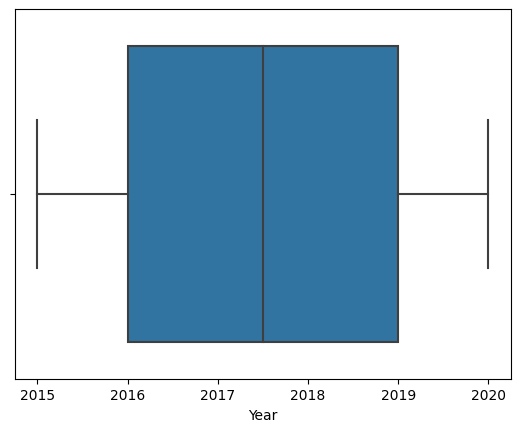

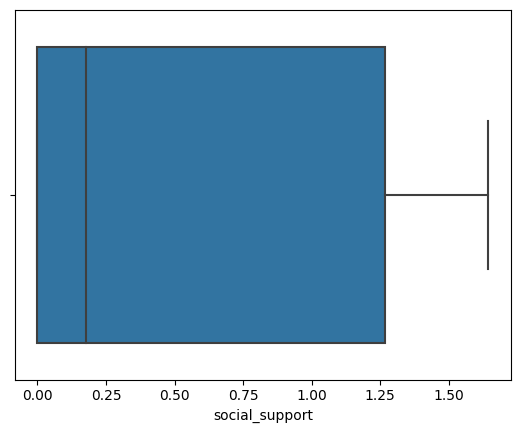

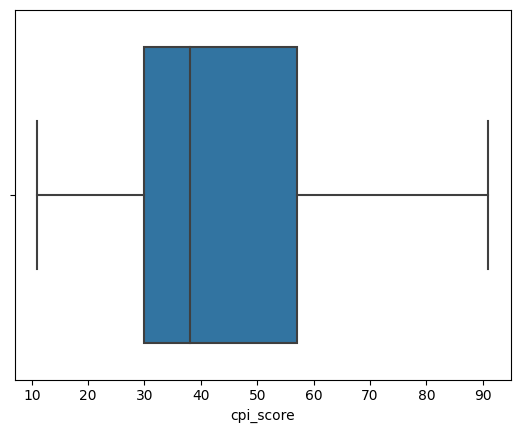

In [10]:
for i in happy.columns:
    if happy[i].dtypes !="object":
        sns.boxplot(x= happy[i])
        plt.show()

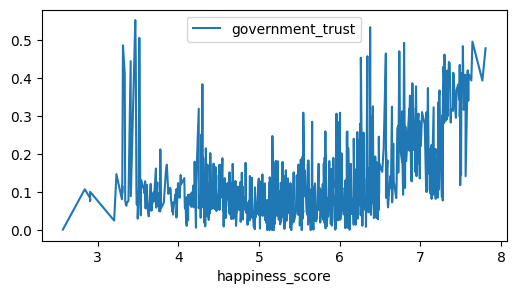

In [11]:
happy.sort_values(by='happiness_score').plot.line('happiness_score','government_trust',figsize=(6,3));

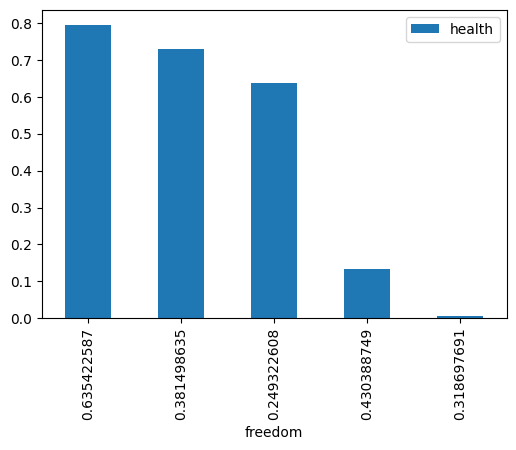

In [12]:
happy.sort_values(by='Year')[:5].plot.bar('freedom','health', figsize=(6,4));

In [13]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [14]:
for i in happy.columns:
    if happy[i].dtypes != "object":
        UL,LL = outlier_limit(happy[i])
        happy[i] = np.where((happy[i]>UL)|(happy[i]<LL), np.nan, happy[i])

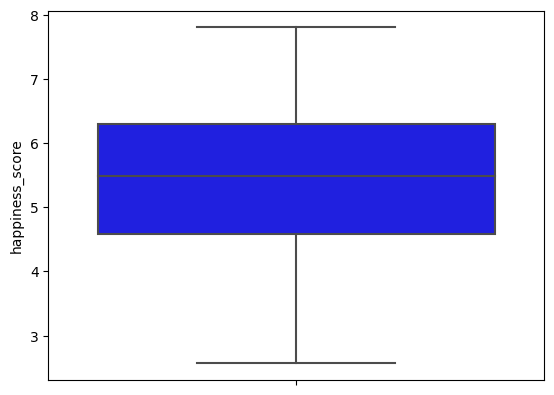

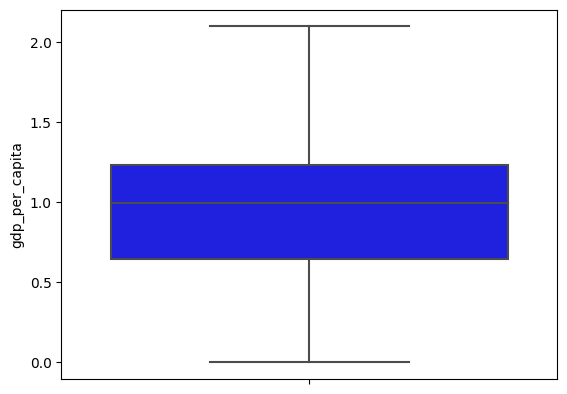

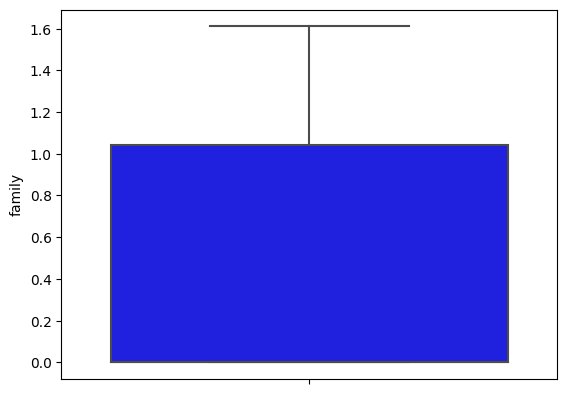

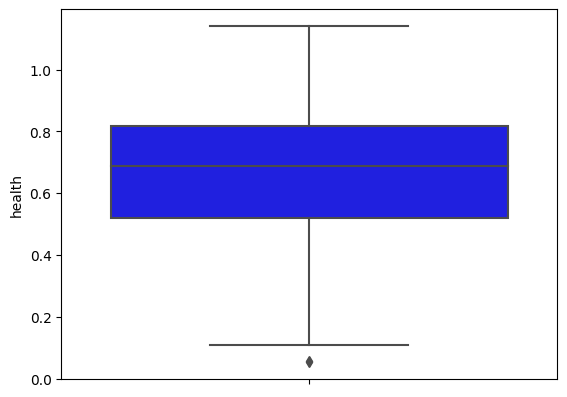

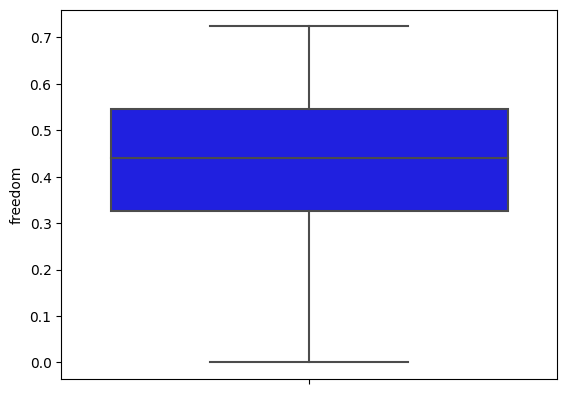

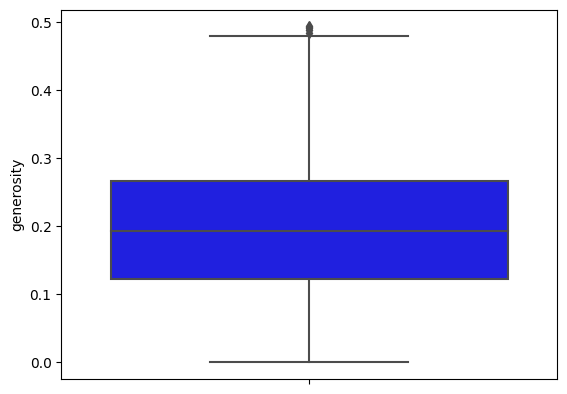

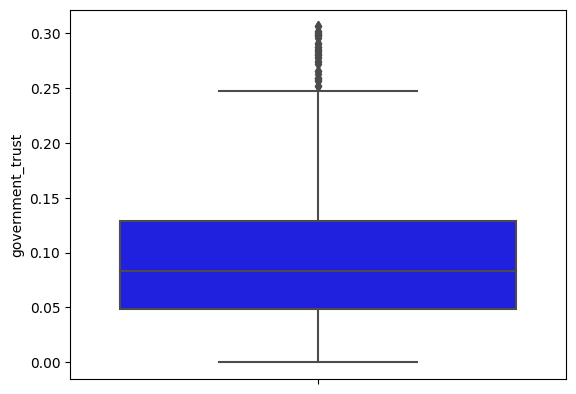

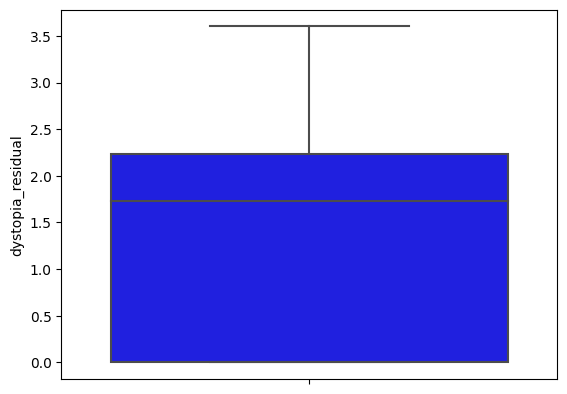

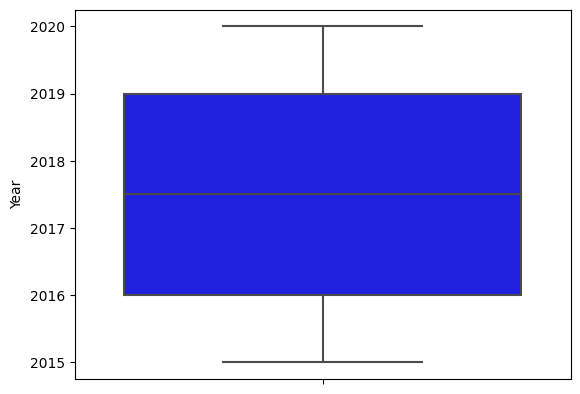

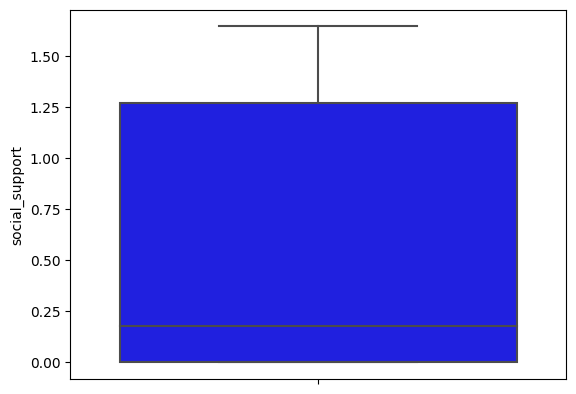

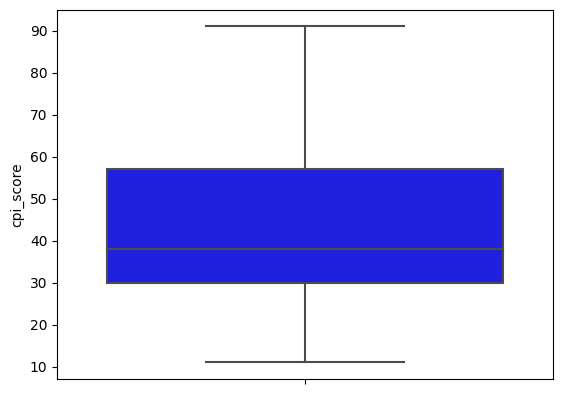

In [15]:
for i in happy.columns:
    if happy[i].dtypes != "object":
        sns.boxplot(y = happy[i], color="blue")
        plt.show()

In [16]:
happy.isnull().mean()*100

Country              0.000000
happiness_score      0.000000
gdp_per_capita       0.000000
family               0.000000
health               1.136364
freedom              0.000000
generosity           2.525253
government_trust     9.722222
dystopia_residual    0.000000
continent            0.000000
Year                 0.000000
social_support       0.000000
cpi_score            0.000000
dtype: float64

In [17]:
happy.dropna(inplace=True)

In [18]:
le=LabelEncoder()

In [19]:
happy['Country']=le.fit_transform(happy['Country'])
happy['continent']=le.fit_transform(happy['continent'])

In [20]:
happy['Year']=pd.to_datetime(happy.Year)

In [21]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 2 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Country            688 non-null    int32         
 1   happiness_score    688 non-null    float64       
 2   gdp_per_capita     688 non-null    float64       
 3   family             688 non-null    float64       
 4   health             688 non-null    float64       
 5   freedom            688 non-null    float64       
 6   generosity         688 non-null    float64       
 7   government_trust   688 non-null    float64       
 8   dystopia_residual  688 non-null    float64       
 9   continent          688 non-null    int32         
 10  Year               688 non-null    datetime64[ns]
 11  social_support     688 non-null    float64       
 12  cpi_score          688 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 69.9 KB

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

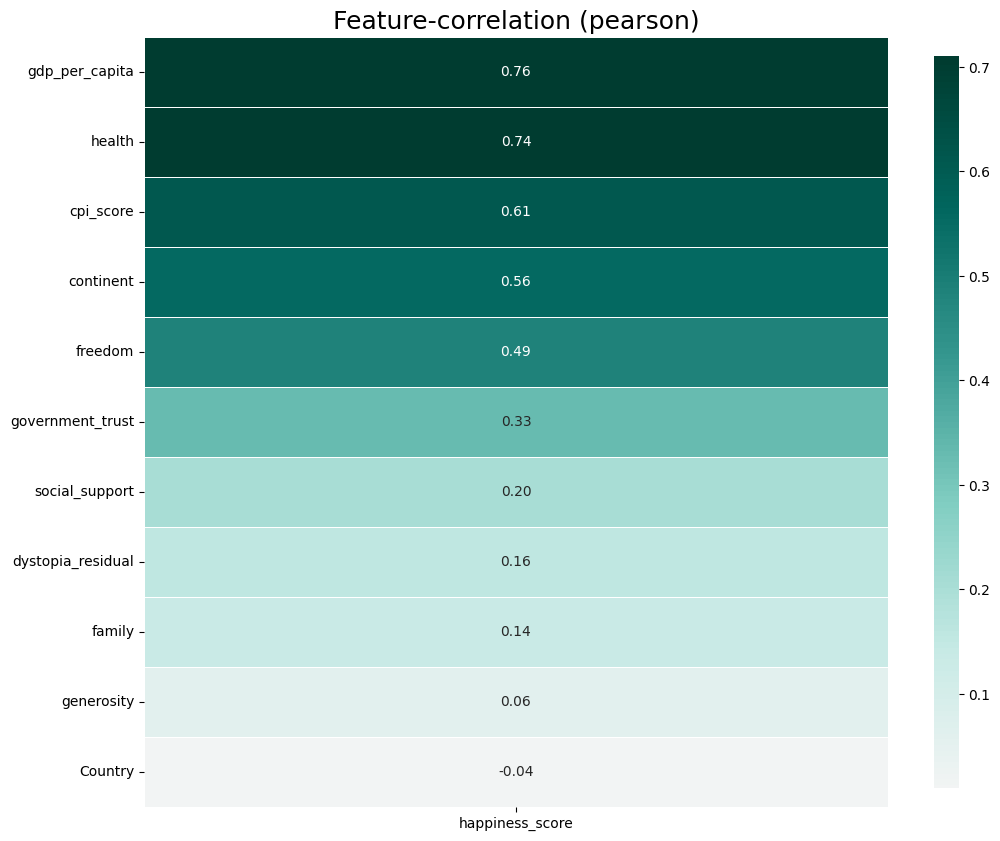

In [22]:
import klib as k
k.corr_plot(data=happy, target='happiness_score')

In [23]:
x=happy[['gdp_per_capita','health','cpi_score','continent']].values
y=happy[['happiness_score']].values

In [24]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR

In [27]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [28]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : linearRegression
AVERAGE RMSE:  0.5745210761849963
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.5745098919739065
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.5764406181671691
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  1.0121173371454535
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.49271484289679685
****************************************************************************************************
cross validation model : BaggingRegressor
AVERAGE RMSE:  0.4924961405092564
**********************************************************

In [29]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with linearRegression
r2score: 69.74126521795068
training_score: 69.48302212148076
testing_score: 69.74126521795068
mae: 0.4527999836873672
mse: 0.3210849189541148
rmse_test: 0.5666435554686162
****************************************************************************************************
model trained with Ridge
r2score: 69.73148583964641
training_score: 69.48296707515324
testing_score: 69.73148583964641
mae: 0.45285268216772673
mse: 0.3211886910025123
rmse_test: 0.5667351153779976
****************************************************************************************************
model trained with LinearSVR
r2score: 69.15816565184738
training_score: 69.36761009146605
testing_score: 69.15816565184738
mae: 0.4554317384385503
mse: 0.32727237121452885
rmse_test: 0.57207724234978
****************************************************************************************************
model trained with Lasso
r2score: -1.4742145367286907
training_score: 0.0
testing_score: -1

In [30]:
RF = RandomForestRegressor()

In [31]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
y_pred = RF.predict(x_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
mse

0.18421999753936308

In [34]:
rmse = np.sqrt(mse)
rmse

0.4292085711392109

In [35]:
y_pred=model.predict(x)
y_pred

array([7.39394012, 7.00573014, 7.28942005, 7.31298   , 6.81954084,
       6.987111  , 6.99720505, 6.97604006, 6.93618403, 6.94298018,
       7.04115003, 6.84586017, 6.63290396, 6.57281013, 6.59090802,
       6.62428005, 6.09608999, 6.46483801, 6.58258001, 6.54292793,
       6.44882991, 6.31504994, 6.25891892, 6.17590001, 6.06995003,
       6.15211994, 6.05546009, 6.04885606, 6.01494094, 5.86031586,
       5.82698003, 5.22970501, 6.00105316, 5.87178987, 6.35059505,
       5.91922997, 5.81157013, 5.87152599, 5.5966899 , 5.70801589,
       5.48741498, 5.49135004, 5.81490986, 5.93344593, 5.99029011,
       5.854248  , 5.99128986, 5.72857004, 5.51393999, 5.22819705,
       5.55088398, 5.37964204, 4.97220399, 5.30175799, 5.44039596,
       5.84370005, 5.5460279 , 5.57648514, 5.31495988, 5.36197387,
       5.12320802, 5.79031001, 5.49989901, 5.08495809, 5.45967297,
       5.37963001, 5.46075216, 5.09198393, 5.67852999, 5.19156211,
       5.29595314, 5.01437593, 5.15045593, 4.89647393, 5.03048

In [36]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,7.504,7.393940
1,7.377,7.005730
2,7.316,7.289420
3,7.284,7.312980
4,7.213,6.819541


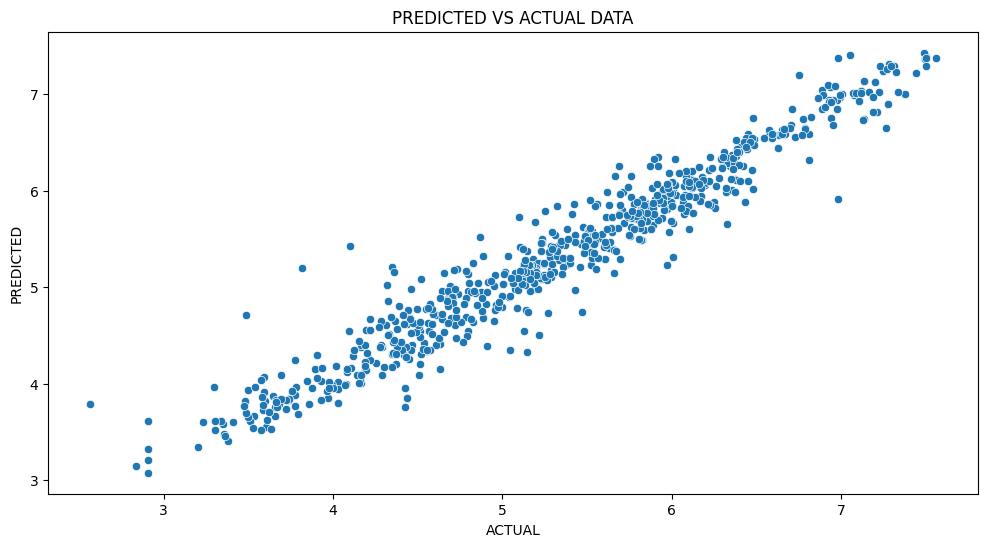

In [37]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");